<a href="https://colab.research.google.com/github/goflvhxj/ML-practice/blob/main/4_%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###**2. 결정 트리**
- 균일하다 : 통일되어 있음(모두 검은공)
- 엔트로피 : 균일성이 높을수록 낮은 값
- 정보이득 : 1 - 엔트로피, 균일성이 높을수록 정보이득값도 큼
- 지니계수 : 정보이득과 반대, 균일성이 높을수록 지니계수 작음

<br>

결정트리 장점
- 쉽다, 직관적이다
- 피처의 스케일링, 정규화 등의 사전 가공 영향도 낮음
<br>

결정트리 단점
- 과적합으로 알고리즘 성능 떨어짐
- 이를 극복위해 트리의 크기를 사전에 제한하는 튜닝 필요

<br>

####**결정 트리 모델의 시각화**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state = 156)

# 붓꽃 데이터를 로딩, 학습과 테스트 데이터 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size = 0.2, random_state = 11)

# DecisionTreeClassifier 학습
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

In [ ]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일 생성
export_graphviz(dt_clf, out_file = "tree.dot", class_names = iris_data.target_names, feature_names = iris_data.feature_names, impurity = True, filled = True)

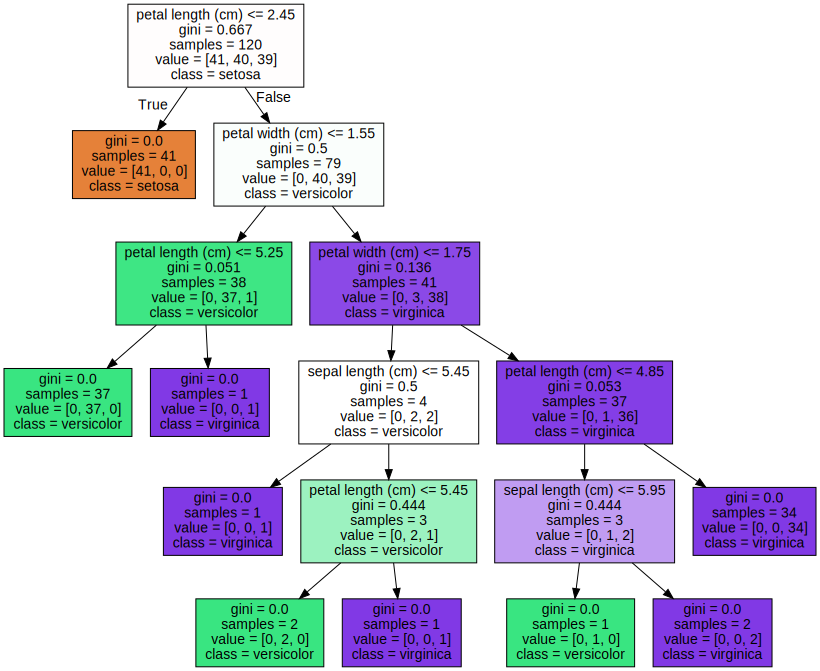

In [ ]:
import graphviz

# 위에서 생성한 tree.dot 파일을 Graphviz가 읽어서 주피터 노트북상에서 시각화
with open("tree.dot") as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)

Feature importances:
[0.025 0.    0.555 0.42 ]
sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


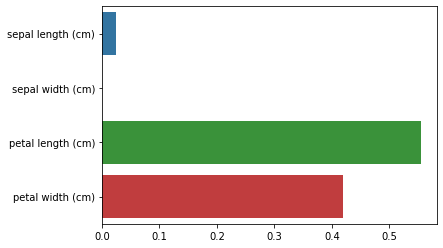

In [ ]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출
print("Feature importances:\n{0}".format(np.round(dt_clf.feature_importances_, 3)))

# feature별 importance 매핑
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
  print('{0} : {1:.3f}'.format(name, value))

# feature importance를 column 별로 시각화
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)

<br>

####**결정 트리 과적합(Overfitting)**

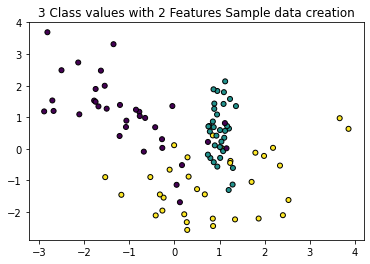

In [ ]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("3 Class values with 2 Features Sample data creation")

# 2차원 시각화를 위해서 피처는 2개, 클래스는 3가지 유형의 분류 샘플 데이터 생성
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2, n_classes=3, n_clusters_per_class=1, random_state=0)

# 그래프 형태로 2개의 피처로 2차원 좌표 시각화, 각 클래스 값은 다른 색깔로 표시
plt.scatter(X_features[:, 0], X_features[:, 1], marker='o', c=y_labels, s=25, edgecolor='k')

<br>

####**Classifier 학습 후 결정 기준 경계 시각화**

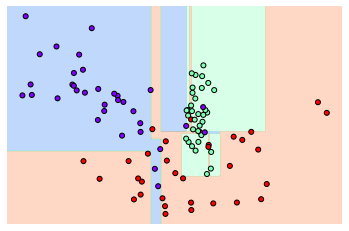

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이터 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이터로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

# 특정한 트리 생성 제약 없는 결정 트리의 학습과 결정 경계 시각화
dt_clf = DecisionTreeClassifier().fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

결정 트리의 기본 하이퍼 파라미터 설정은 리프 노드 안에 데이터가 모두 균일하거나 한개만 존재해야 하는 엄격한 분할 기준으로 인해 결정 기준 경계가 많아지고 복잡해짐. 이러한 복잡한 모델은 학습 데이터 세트의 특성과 약간만 달라져도 예측 정확도가 떨어지게 됨.


min_samples_leaf = 6으로 설정하여 6개 이하의 데이터는 리프 노드를 생성할 수 있도록 규칙을 완화시켜 결정 기준 경계 변화는 것 확인

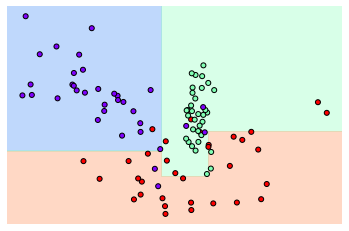

In [ ]:
# min_samples_leaf=6으로 트리 생성 조건을 제약한 결정 경계 시각화
dt_clf = DecisionTreeClassifier(min_samples_leaf=6).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

이상치에 크게 반응하지 않으면서 좀 더 일반화된 분류 규칙에 따라 분류됐음을 알 수 있음. <br>결정 트리 모델의 예측 성능은 첫 번째 모델보다 두 번째 모델이 더 뛰어날 가능성이 높음. <br>학습데이터에 지나치게 최적화된 분류 기준은 오히려 테스트 데이터 세트에서 정확도를 떨어뜨릴 수 있음.

<br>

####**결정 트리 실습 - 사용자 행동 인식 데이터 세트**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# features.txt 파일에는 피처 이름 index와 피처명이 공백으로 분리되어 있음. 이를 DataFrame으로 로드
feature_name_df = pd.read_csv("/content/drive/MyDrive/Jupyter/human_activity/features.txt", sep = '\s+', header=None, names=['column_index', 'column_name'])

# 피처명 index를 제거하고, 피처명만 리스트 객체로 생성한 뒤 샘플로 10개만 추출
feature_name = feature_name_df.iloc[:,1].values.tolist()
print('전체 피처명에서 10개만 추출:', feature_name[:10])

전체 피처명에서 10개만 추출: ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


<br>

중복된 피처명을 가지고 있는 경우 DataFrame에 로드할 때 오류가 발생하므로 중복된 피처명에 대해서 원본 피처명에 _1 또는 _2를 추가로 부여해 변경해줘야 함

In [ ]:
feature_dup_df = feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['column_index'] > 1].count())
feature_dup_df[feature_dup_df['column_index']> 1].head()

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


In [ ]:
def get_new_feature_name_df(old_feature_name_df):
  feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(), columns=['dup_cnt'])
  feature_dup_df = feature_dup_df.reset_index()
  new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer') # outer는 합집합
  new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) if x[1] > 0 else x[0], axis=1)
  new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
  return new_feature_name_df

In [ ]:
import pandas as pd

def get_human_dataset():

  # 각 데이터 파일은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당
  feature_name_df = pd.read_csv("/content/drive/MyDrive/Jupyter/human_activity/features.txt", sep='\s+', header=None, names=['column_index', 'column_name'])

  # 중복된 피처명을 수정하는 get_new_feature_name_df() 수행
  new_feature_name_df = get_new_feature_name_df(feature_name_df)

  # Dataframe에 피처명을 칼럼으로 부여하기 위해 리스트 객체로 다시 변환
  feature_name = new_feature_name_df.iloc[:, 1].values.tolist()

  # 학습 피처 데이터세트와 테스트 피처 데이터를 DataFrame으로 로딩. 칼럼명은 feature_name 적용
  X_train = pd.read_csv("/content/drive/MyDrive/Jupyter/human_activity/train/X_train.txt",sep='\s+', names = feature_name)
  X_test = pd.read_csv('/content/drive/MyDrive/Jupyter/human_activity/test/X_test.txt', sep = '\s+', names = feature_name)

  # 학습 레이블과 테스트 레이블 데이터를 DataFrame으로 로딩, 칼럼명은 action으로 부여
  y_train = pd.read_csv('/content/drive/MyDrive/Jupyter/human_activity/train/y_train.txt', sep = '\s+', names = ['action'])
  y_test = pd.read_csv('/content/drive/MyDrive/Jupyter/human_activity/test/y_test.txt', sep= '\s+', names = ['action'])

  # 로드된 학습/테스트용 DataFrame을 모두 반환
  return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()

In [ ]:
print('## 학습 피처 데이터셋 info()')
print(X_train.info())
#X_train.dtypes

## 학습 피처 데이터셋 info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


In [ ]:
print(y_train['action'].value_counts())

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64


<br>

사이킷런의 DecisionTreeClassifier를 사용해 동작 예측 분류를 수행

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 예제 반복 시마다 동일한 예측 결과 도출 위해 random_state 설정
dt_clf = DecisionTreeClassifier(random_state = 156)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('결정 트리 예측 정확도 : {0:.4f}'.format(accuracy))

# DecisionTreeClassifier의 하이퍼 파라미터 추출
print('DecisionTreeClassifier 기본 하이퍼 파라미터 : \n', dt_clf.get_params())

결정 트리 예측 정확도 : 0.8548
DecisionTreeClassifier 기본 하이퍼 파라미터 : 
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 156, 'splitter': 'best'}


> X_train의 칼럼 중 1개가 object형식이라 fit하는 부분에서 오류가 났음.<br>
알고보니 X_train, X_test 파일이 큰데 끝까지 업로드 되지 않은 상태에서 실행했던 것이었음.

<br>

* 결정 트리의 트리 깊이(Tree Depth)가 예측 정확도에 주는 영향을 살펴볼것임<br>
* GridSearchCV를 이용해 사이킷런 결정 트리의 깊이를 조절할 수 있는 하이퍼 파라미터인 max_depth 값을 변화시키며 예측 성능을 확인<br>
* max_depth를 6,8,10,12,16,20,24로 늘려가며 예측 성능 측정 & 교차 검증(CV)는 5개 세트로 진행

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {'max_depth' : [6,8,10,12,16,20,24]}

grid_cv = GridSearchCV(dt_clf, param_grid = params, scoring='accuracy', cv=5, verbose = 1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치 : {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터 : ', grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
GridSearchCV 최고 평균 정확도 수치 : 0.8513
GridSearchCV 최적 하이퍼 파라미터 :  {'max_depth': 16}


In [ ]:
# GridSearchCV 객체의 cv_results_ 속성을 DataFrame으로 생성
cv_results_df = pd.DataFrame(grid_cv.cv_results_)

# max_depth 파라미터 값과 그때의 테스트 세트, 학습 데이터 세트의 정확도 수치 추출
cv_results_df[['param_max_depth', 'mean_test_score']]
#cv_results_df

,param_max_depth,mean_test_score
0,6,0.850791
1,8,0.851069
2,10,0.851209
3,12,0.844135
4,16,0.851344
5,20,0.850800
6,24,0.849440


mean_test_score칼럼은 5개 CV 세트에서 검증용 데이터 세트의 정확도 평균 수치<br>
지금까지는 학습 데이터에 제일 적합한 max_depth 파라미터값을 찾은 것 <br>
이제부터는 별도의 테스트 데이터 세트에서 max_depth의 변화에 다른 값을 측정

In [ ]:
max_depths = [6,8,10,12,16,20,24]

# max_depth 값을 변화시키며 그때마다 학습과 테스트 세트에서의 예측 성능 측정
for depth in max_depths:
  dt_clf = DecisionTreeClassifier(max_depth = depth, random_state = 156)
  dt_clf.fit(X_train, y_train)
  pred = dt_clf.predict(X_test)
  accuracy = accuracy_score(y_test, pred)
  print('max_depth = {0} 정확도: {1:.4f}'.format(depth, accuracy))

max_depth = 6 정확도: 0.8558
max_depth = 8 정확도: 0.8707
max_depth = 10 정확도: 0.8673
max_depth = 12 정확도: 0.8646
max_depth = 16 정확도: 0.8575
max_depth = 20 정확도: 0.8548
max_depth = 24 정확도: 0.8548


max_depth가 8일 경우가 87.07%로 가장 높은 정확도를 나타냄. max_depth가 8을 넘어갈수록 점점 정확도가 감소함. 따라서 깊이가 깊어질수록 테스트 데이터 세트의 정확도는 더 떨어진다.<br>
이처럼 결정 트리는 깊이가 깊어질수록 과적합의 영향력이 커지므로 하이퍼 파라미터를 통해 깊이를 제어할 수 있어야 함.

<br>

max_depth와 min_samples_split을 같이 변경하며 정확도 성능을 튜닝

In [ ]:
params = {'max_depth' : [8,12,16,20], 'min_samples_split' : [16,24],}

grid_cv = GridSearchCV(dt_clf, params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치 : {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터 : ', grid_cv.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
GridSearchCV 최고 평균 정확도 수치 : 0.8549
GridSearchCV 최적 하이퍼 파라미터 :  {'max_depth': 8, 'min_samples_split': 16}


In [ ]:
best_df_clf = grid_cv.best_estimator_
pred1 = best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred1)
print('결정 트리 예측 정확도:{0:.4f}'.format(accuracy))

결정 트리 예측 정확도:0.8717


GridSearchCV를 이용하여 얻어낸 최적의 파라미터 값을 이용하여 정확도를 측정하였을 때 87.17%로 정확도가 더 높아진 것을 확인할 수 있다.

마지막으로 각 피처의 중요도를 feature_importances_ 속성을 이용하여 중요도가 높은 순으로 Top 20 피처를 막대그래프로 표현

tGravityAcc-min()-X                0.253354
fBodyAccJerk-bandsEnergy()-1,16    0.212584
angle(Y,gravityMean)               0.139001
fBodyAccMag-energy()               0.115478
tGravityAcc-arCoeff()-Z,2          0.101885
fBodyGyro-maxInds-X                0.023971
tGravityAcc-energy()-Y             0.020470
tBodyGyro-correlation()-Y,Z        0.016513
tGravityAccMag-arCoeff()1          0.015741
tBodyAcc-correlation()-X,Y         0.009972
fBodyAcc-max()-Y                   0.008825
tBodyGyro-max()-X                  0.008550
tGravityAcc-max()-Y                0.006290
fBodyGyro-max()-X                  0.005247
tBodyGyro-min()-X                  0.004373
tBodyAccJerk-correlation()-X,Y     0.003967
tBodyGyroJerk-max()-X              0.003471
tGravityAcc-arCoeff()-Y,3          0.003025
angle(Z,gravityMean)               0.002987
tGravityAcc-min()-Z                0.002912
dtype: float64


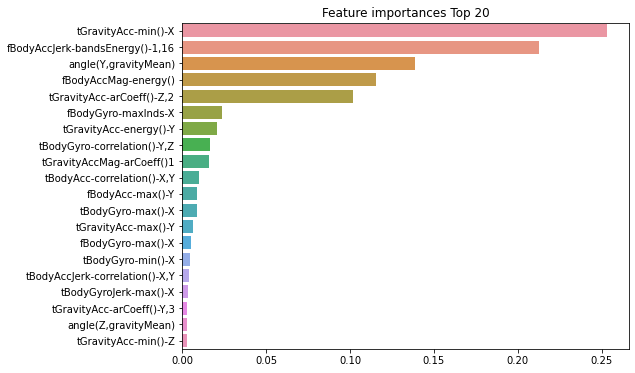

In [ ]:
import seaborn as sns

ftr_importances_values = best_df_clf.feature_importances_

# Top 중요도로 정렬을 쉽게 하고, 시본의 막대그래프로 쉽게 표현하기 위해 Series로 변환
ftr_importances = pd.Series(ftr_importances_values, index = X_train.columns)

# 중요도값 순으로 Series를 정렬
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
print(ftr_top20)
plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

막대 그래프를 통해 상위 5개의 피처들이 매우 중요하게 규칙 생성에 영향을 미침을 확인 할 수 있다.

<br>
<br>

###**3. 앙상블 학습**

앙상블 기법 : 여러 개의 분류기(Classifier)를 생성하고 그 예측을 결합함으로써 보다 정확한 최종 예측을 도출하는 기법(like 집단지성), 정형 데이터에서 주로 쓰임
<br>


1. **보팅(Voting)**
 * 서로 다른 ML 알고리즘을 가진 분류기를 같은 데이터 세트에 대해 학습하고 예측한 결과를 가지고 보팅을 통해 최종 예측 결과 선정
<br>

2. **배깅(Bagging)**
 * 서로 같은 ML 알고리즘을 가진 분류기에 부트 스트래핑 방식으로 샘플링된 데이터 세트에 대해 학습을 통해 개별적인 예측을 수행해 보팅을 통해 최종 예측 결과 선정<br><br>
 * 부트스트래핑 : 원본 학습 데이터를 샘플링해 추출, 개별 Classifier에게 데이터를 샘플링해서 추출하는 방식<br><br>
 * 교차 검증(CV)이 데이터 세트간 중첩을 허용하지 않는 것과 다르게 배깅 방식은 중첩을 허용, 즉 부트스트래핑 된 데이터 간 중복 존재
<br>

3. **부스팅(Boosting)**
 * 여러 개의 분류기가 순차적으로 학습을 수행하되, 앞에서 학습한 분류기가 예측이 틀린 데이터에 대해서는 올바르게 예측할 수 있도록 다음 분류기에게는 가중치를 부여하여 학습과 예측 진행<br><br>
 * 예측 성능이 뛰어나 앙상블 학습 주도<br><br>
 * ex. 그래디언트 부스트, XGBoost, LightGBM

4. **스태깅(Stacking)**
 * 다른 모델의 예측 결괏값을 다시 학습 데이터로 만들어서 다른 모델(메타 모델)로 재학습시켜 결과 예측





#### **보팅 유형 - 하드보팅과 소프트 보팅**

* 하드 보팅 : 다수의 classifier 간 다수결로 최종 class 결정
* 소프트 보팅 : 다수의 classifier 들의 class 확률을 평균하여 결정
<br>

주로 소프트 보팅을 사용

<br>

#### **보팅 분류기(Voting Classifier)**

In [ ]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()
dir(cancer) # 어떤 데이터들이 있는지 확인
data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [ ]:
# 개별 모델은 로지스틱 회귀와 KNN(보팅 예제이므로 ML 알고리즘이 각각 달라야함)
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors=8)

# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기
vo_clf = VotingClassifier(estimators=[('LR',lr_clf),('KNN',knn_clf)], voting = 'soft')
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size = 0.2, random_state = 156)

# VotingClassifier 학습/예측/평가
vo_clf.fit(X_train, y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도 : {0:.4f}'.format(accuracy_score(y_test,pred)))

# 개별 모델의 학습/예측/평가
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
  classifier.fit(X_train, y_train)
  pred = classifier.predict(X_test)
  class_name = classifier.__class__.__name__
  print('{0} 정확도 : {1:.4f}'.format(class_name, accuracy_score(y_test, pred)))

Voting 분류기 정확도 : 0.9474
LogisticRegression 정확도 : 0.9386
KNeighborsClassifier 정확도 : 0.9386


<br>
<br>

### **4. 랜덤 포레스트**

- 배깅 방식

- 랜덤 포레스트 : 여러 개의 결정 트리 분류기가 전체 데이터에서 배깅 방식으로 각자의 데이터를 샘플링해 개별적으로 학습을 수행한 뒤 최종적으로 모든 분류기가 보팅을 통해 예측 결정

- 데이터가 중첩된 개별 데이터 세트에 결정 트리 분류기를 각각 적용하는 것

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# 결정 트리에서 사용한 get_human_dataset()을 이용해 학습/테스트용 DataFrame 반환
X_train, X_test, y_train, y_test = get_human_dataset()

# 랜덤 포레스트 학습 및 별도의 테스트 세트로 예측 성능 평가
rt_clf = RandomForestClassifier()
rt_clf.fit(X_train, y_train)
pred = rt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.9264


<br>
<br>

####**랜덤 포레스트 하이퍼 파라미터 및 튜닝**

- 트리 기반의 앙상블 알고리즘의 단점 : 하이퍼 파라미터 too much, 튜닝을 위한 시간이 길다.
- n-estimators : 랜덤 포레스트에서 결정 트리의 개수 지정, 많이 설정할수록 좋은성능 기대 가능 but 계속 증가시킨다고 성능이 무조건 향상 X, 늘릴수록 학습 수행시간이 오래 걸림

GridSearchCV를 이용해 랜덤 포레스트의 하이퍼 파라미터를 튜닝.<br>
사용자 행동 데이터 세트를 그대로 이용하고, 튜닝 시간 절약위해 n_estimators=100, CV=2 로 설정해 최적 하이퍼 파라미터를 구하는 코드 구현

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {'n_estimators':[100], 'max_depth':[6,8,10,12], 'min_samples_leaf':[8,12,18], 'min_samples_split':[8,16,20]}

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state = 0, n_jobs = -1) # n_jobs=-1 파라미터 추가시 모든 CPU 코어를 이용해 학습
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv = 2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도: 0.9180


위의 하이퍼 파라미터일 때 정확도가 91.8%인 것을 알 수 있다. 이제 n_estimators를 300으로 늘려 비교해 볼 것이다.

In [ ]:
rf_clf1 = RandomForestClassifier(n_estimators = 300, max_depth = 10, min_samples_leaf = 8, min_samples_split = 8, random_state = 0)
rf_clf1.fit(X_train, y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도: 0.9165


오히려 n_estimators를 300으로 더 늘렸을 때가 100일 때보다 정확도가 떨어지는 것을 알 수 있다.

피처의 중요도를 막대그래프로 시각화

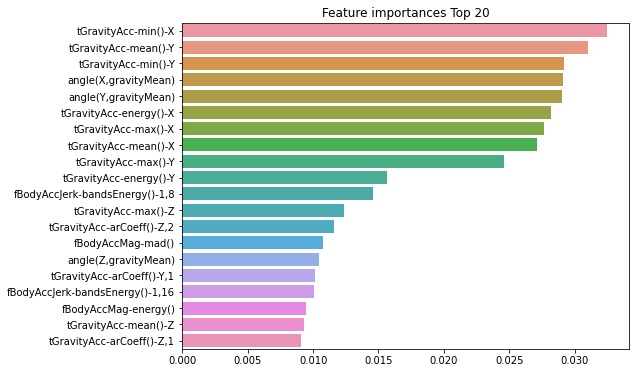

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending = False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x = ftr_top20, y = ftr_top20.index)
plt.show()

<br>
<br>

### **5. GBM(Gradient Boosting Machine)**

- GBM : 경사 하강법을 이용하여 부스팅 알고리즘을 이용하는 방법

- 경사 하강법 : 오류값을 최소화하는 방향성을 가지고 반복적으로 가중치의 값을 업데이트 하는 방법

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = get_human_dataset()

# GBM 수행 시간 측정을 위함. 시작 시간 설정
start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state = 0)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print("GBM 정확도: {0:.4f}".format(gb_accuracy))
print("GBM 수행 시간: {0:.1f}".format(time.time() - start_time))

GBM 정확도: 0.9386
GBM 수행 시간: 866.3


정확도도 랜덤 포레스트보다 높지만 시간이 굉장히 오래 걸리는 것을 알 수 있음(12분 18초).<br>

일반적으로 GBM이 랜덤 포레스트보다는 예측 성능이 조금 뛰어난 경우가 많음<br>

하이퍼 파라미터 튜닝을 통해 정확도를 더 올릴 수 있지만 시간이 굉장히 오래걸림.<br>

* learning_rate, n_estimators는 상호 보완적으로 조합해 사용한다. learning_rate를 작게 하고 n_estimators를 크게 하면 더 이상 성능이 좋아지지 않는 한계점까지는 예측 성능이 조금씩 좋아질 수 있음.

<br>

###**6. XGBoost(eXtra Gradient Boost)**

- XGBoost는 GBM에 기반하고 있지만, GBM의 단점인 느린 수행 시간 및 과적합 규제 부재 등의 문제를 해결해 각광받고 있는 알고리즘임.

- XGBoost는 GBM 대비 수행 시간이 빠르다는 것이지 다른 ML 알고리즘에 비해 빠르다는 것은 아님.

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier

In [ ]:
import xgboost

print(xgboost.__version__)

0.90


#### **파이썬 래퍼 XGBoost 적용 - 위스콘신 유방암 예측**

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
  confusion = confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  f1 = f1_score(y_test, pred)
  roc_auc = roc_auc_score(y_test, pred_proba)

  print('오차행렬')
  print(confusion)
  print('정확도:{0:.4f}, 정밀도:{1:.4f}, 재현율:{2:.4f}, F1:{3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [ ]:
import xgboost as xgb
from xgboost import plot_importance # 피처의 중요도를 시각화해주는 모듈
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dataset = load_breast_cancer()
X_features = dataset.data
y_label = dataset.target
cancer_df = pd.DataFrame(data = X_features, columns = dataset.feature_names)
cancer_df['target'] = y_label
cancer_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [ ]:
print(dataset.target_names)
print(cancer_df['target'].value_counts())

['malignant' 'benign']
1    357
0    212
Name: target, dtype: int64


malignant는 악성(암)으로 0, benign은 양성으로 1로 나타남<br>
전체 데이터 셋의 80%를 학습용 데이터로 분리

In [ ]:
# 전체 데이터 중 80%는 학습용, 20%는 테스트용 데이터로 추출
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size = 0.2, random_state = 156)
print(X_train.shape, X_test.shape)

(455, 30) (114, 30)


넘파이 형태의 학습 데이터 세트와 테스트 데이터 세트를 DMatrix로 변환

In [ ]:
dtrain = xgb.DMatrix(data = X_train, label = y_train)
dtest = xgb.DMatrix(data = X_test, label = y_test)

In [ ]:
# 하이퍼 파라미터 설정
params = {'max_depth':3, 'eta':0.1, 'objective':'binary:logistic', 'eval_metric':'logloss', 'early_stoppings':100}
num_rounds = 400

In [ ]:
# train 데이터 세트는 'train, evaluation(test) 데이터 세트는 'eval'로 명기
wlist = [(dtrain,'train'),(dtest,'eval')]

# 하이퍼 파라미터와 early stopping 파라미터를 train() 함수의 파라미터로 전달
xgb_model = xgb.train(params = params, dtrain=dtrain, num_boost_round = num_rounds, early_stopping_rounds = 100, evals = wlist)

[0]	train-logloss:0.609688	eval-logloss:0.61352
Multiple eval metrics have been passed: 'eval-logloss' will be used for early stopping.

Will train until eval-logloss hasn't improved in 100 rounds.
[1]	train-logloss:0.540803	eval-logloss:0.547843
[2]	train-logloss:0.483753	eval-logloss:0.494248
[3]	train-logloss:0.434457	eval-logloss:0.447986
[4]	train-logloss:0.39055	eval-logloss:0.409109
[5]	train-logloss:0.354146	eval-logloss:0.374977
[6]	train-logloss:0.321222	eval-logloss:0.345714
[7]	train-logloss:0.292593	eval-logloss:0.320529
[8]	train-logloss:0.267467	eval-logloss:0.29721
[9]	train-logloss:0.245153	eval-logloss:0.277991
[10]	train-logloss:0.225694	eval-logloss:0.260302
[11]	train-logloss:0.207938	eval-logloss:0.246037
[12]	train-logloss:0.192184	eval-logloss:0.231556
[13]	train-logloss:0.177916	eval-logloss:0.22005
[14]	train-logloss:0.165222	eval-logloss:0.208572
[15]	train-logloss:0.153622	eval-logloss:0.199993
[16]	train-logloss:0.14333	eval-logloss:0.190118
[17]	train-logl

xgboost의 predict는 sklearn의 predict와 달리 예측 결괏값이 아닌 예측 결과를 추정할 수 있는 확률 값을 반환, 즉 확률이 0.5이상이면 1(양성), 그렇지 않으면 0(악성)으로 예측 값 결정하는 로직 추가해야함

In [ ]:
pred_probs = xgb_model.predict(dtest)
print('predict() 수행 결과값을 10개만 표시, 예측 확률값으로 표시됨')
print(np.round(pred_probs[:10],3))

# 예측 확률이 0.5보다 크면 1, 그렇지 않으면 0으로 예측값 결정해 리스트 객체인 preds에 저장
preds = [1 if x > 0.5 else 0 for x in pred_probs]
print('예측값 10개만 표시: ', preds[:10])

predict() 수행 결과값을 10개만 표시, 예측 확률값으로 표시됨
[0.934 0.003 0.91  0.094 0.993 1.    1.    0.999 0.997 0.   ]
예측값 10개만 표시:  [1, 0, 1, 0, 1, 1, 1, 1, 1, 0]


xgboost의 plot_importance() API는 피처의 중요도를 막대그래프 형식으로 나타냄. 기본 평가 지표로 f1 스코어를 기반으로 해 각 피처의 중요도를 나타냄.

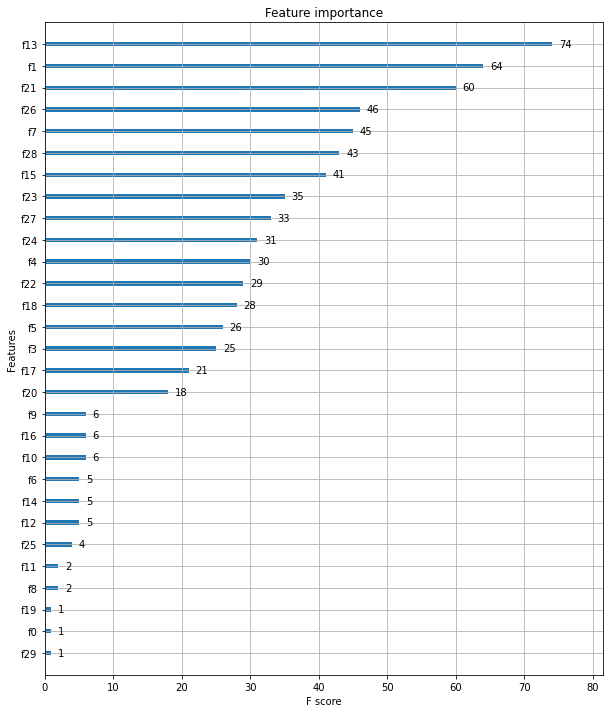

In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10,12))
plot_importance(xgb_model, ax=ax)

<br>
<br>

####**사이킷런 래퍼 XGBoost의 개요 및 적용**

위에서는 파이썬 래퍼 XGBoost를 봤지만 사이킷런과 호환돼 편리하게 사용할 수 있는 사이킷런 래퍼 XGBoost가 나왔기 때문에 앞으로는 이를 사용할 것임.

In [ ]:
# 사이킷런 래퍼 XGBoost 클래스인 XGBClassifier 임포트
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth = 3)
xgb_wrapper.fit(X_train,y_train)
w_preds = xgb_wrapper.predict(X_test)
w_pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]

In [ ]:
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators = 400, learning_rate = 0.1, max_depth=3)
evals = [(X_test, y_test)]
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='logloss', eval_set =evals, verbose=True)
ws100_preds = xgb_wrapper.predict(X_test)
ws100_pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]

[0]	validation_0-logloss:0.61352
Will train until validation_0-logloss hasn't improved in 100 rounds.
[1]	validation_0-logloss:0.547842
[2]	validation_0-logloss:0.494247
[3]	validation_0-logloss:0.447986
[4]	validation_0-logloss:0.409109
[5]	validation_0-logloss:0.374977
[6]	validation_0-logloss:0.345714
[7]	validation_0-logloss:0.320529
[8]	validation_0-logloss:0.29721
[9]	validation_0-logloss:0.277991
[10]	validation_0-logloss:0.260302
[11]	validation_0-logloss:0.246037
[12]	validation_0-logloss:0.231556
[13]	validation_0-logloss:0.22005
[14]	validation_0-logloss:0.208572
[15]	validation_0-logloss:0.199993
[16]	validation_0-logloss:0.190118
[17]	validation_0-logloss:0.181818
[18]	validation_0-logloss:0.174729
[19]	validation_0-logloss:0.167657
[20]	validation_0-logloss:0.158202
[21]	validation_0-logloss:0.154725
[22]	validation_0-logloss:0.148947
[23]	validation_0-logloss:0.143308
[24]	validation_0-logloss:0.136344
[25]	validation_0-logloss:0.132778
[26]	validation_0-logloss:0.127912

311번 반복시 logloss가 0.085948이고 211번 반복 시 logloss가 0.85593인데, 211번에서 311번까지 early_stopping_rounds = 100으로 지정된 100번의 반복 동안 성능 평가 지수가 향상 되지 않았기 때문에 더 이상 반복하지 않고 멈춘 것 (212~311번까지 예측오류가 0.85593보다 작은게 한개도 없는 것)

In [ ]:
get_clf_eval(y_test, ws100_preds, ws100_pred_proba)

오차행렬
[[34  3]
 [ 1 76]]
정확도:0.9649, 정밀도:0.9620, 재현율:0.9870, F1:0.9744, AUC:0.9954


In [ ]:
# early_stopping_rounds를 10으로 설정하고 재 학습
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=10, eval_metric='logloss', eval_set = evals, verbose=True)
ws10_preds = xgb_wrapper.predict(X_test)
ws10_pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]

[0]	validation_0-logloss:0.61352
Will train until validation_0-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.547842
[2]	validation_0-logloss:0.494247
[3]	validation_0-logloss:0.447986
[4]	validation_0-logloss:0.409109
[5]	validation_0-logloss:0.374977
[6]	validation_0-logloss:0.345714
[7]	validation_0-logloss:0.320529
[8]	validation_0-logloss:0.29721
[9]	validation_0-logloss:0.277991
[10]	validation_0-logloss:0.260302
[11]	validation_0-logloss:0.246037
[12]	validation_0-logloss:0.231556
[13]	validation_0-logloss:0.22005
[14]	validation_0-logloss:0.208572
[15]	validation_0-logloss:0.199993
[16]	validation_0-logloss:0.190118
[17]	validation_0-logloss:0.181818
[18]	validation_0-logloss:0.174729
[19]	validation_0-logloss:0.167657
[20]	validation_0-logloss:0.158202
[21]	validation_0-logloss:0.154725
[22]	validation_0-logloss:0.148947
[23]	validation_0-logloss:0.143308
[24]	validation_0-logloss:0.136344
[25]	validation_0-logloss:0.132778
[26]	validation_0-logloss:0.127912


In [ ]:
get_clf_eval(y_test, ws10_preds, ws10_pred_proba)

오차행렬
[[34  3]
 [ 2 75]]
정확도:0.9561, 정밀도:0.9615, 재현율:0.9740, F1:0.9677, AUC:0.9947


get_clf_eval함수를 통해 예측 성능을 측정해보면 early_stopping_rounds = 100일 때보다 정확도가 낮은 것을 알 수 있음<br>
즉, 너무 낮게 early_stopping_rounds를 설정해도 안됨

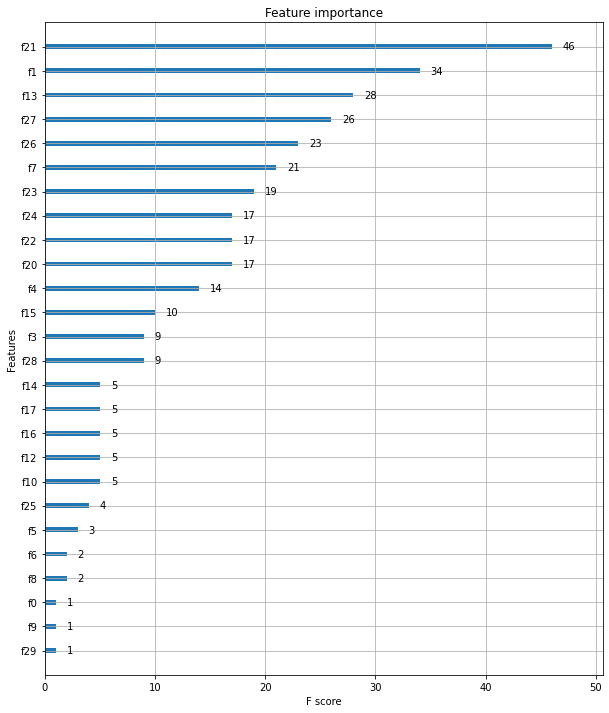

In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig,ax = plt.subplots(figsize=(10,12))
# 사이킷런 Wrapper 클래스를 입력해도 무방
plot_importance(xgb_wrapper, ax=ax)

<br>
<br>

###**7. LightGBM**

**특징**<br>
- 리프 중심 트리 분할 방식 사용 (대부분의 GBM 계열은 균형 트리 분할 방식으로 사용함)<br>
- LightGBM은 XGBoost와 함께 부스팅 계열 알고리즘에서 가장 각광받음
- LightGBM의 가장 큰 장점은 XGBoost보다 학습에 걸리는 시간이 훨씬 적다.
- LightGBM과 XGBoost의 예측 성능은 별다른 차이가 없다.
- LightGBM의 한가지 단점은 적은 데이터 세트에 적용할 경우 과적합이 발생하기 쉽다.
<br><br>

**리프 중심 트리 분할**<br>
* 최대 손실 값을 가지는 리프 노드를 지속적으로 분할하며 트리의 깊이가 깊고 비대칭적인 규칙 트리 생성
* 학습을 반복할수록 균형 트리 분할 방식보다 예측 오류 손실을 최소화 할 수 있음 
<br>  <br>

**균형 트리 분할**<br>
* 최대한 균형 잡힌 트리를 유지하면서 분할하기 때문에 트리의 깊이 최소화
* but 균형을 맞추기 위한 시간이 필요<br>




**과적합 제어**
- larning_rate를 작게 하며 n_estimators를 크게 함
- reg_lambda, reg_alpha와 같은 regularization 적용
  - L1 : 상수값을 빼주기 때문에 특정 W는 0으로 수렴해 몇개의 중요한 W만 남음. 즉, 의미있는 값 추출 원할 땐 L1이 효과적, but 미분 불가능해 gradient-based learning 시에는 부적합
  - L2 : outlier 신경써야 하는 경우 사용
- 학습데이터에 사용할 피처 개수나 데이터 샘플링 레코드 개수 줄이기 위해 colsample_bytree, subsample 파라미터 적용

<br>
<br>

####**LightGBM 적용 - 위스콘신 유방암 예측** 

In [ ]:
from lightgbm import LGBMClassifier

import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

dataset = load_breast_cancer()
ftr = dataset.data
target = dataset.target

# 전체 데이터 중 80%는 학습용 데이터 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test = train_test_split(ftr, target, test_size = 0.2, random_state=156)

# 앞서 XGBoost와 동일하게 n_estimators는 400 설정
lgbm_wrapper = LGBMClassifier(n_estimators=400)

# LightGBM도 XGBoost와 동일하게 조기 중단 수행 가능
evals = [(X_test, y_test)]
lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric = "logloss", eval_set = evals, verbose = True)
preds = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:,1]

[1]	valid_0's binary_logloss: 0.565079	valid_0's binary_logloss: 0.565079
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's binary_logloss: 0.507451	valid_0's binary_logloss: 0.507451
[3]	valid_0's binary_logloss: 0.458489	valid_0's binary_logloss: 0.458489
[4]	valid_0's binary_logloss: 0.417481	valid_0's binary_logloss: 0.417481
[5]	valid_0's binary_logloss: 0.385507	valid_0's binary_logloss: 0.385507
[6]	valid_0's binary_logloss: 0.355846	valid_0's binary_logloss: 0.355846
[7]	valid_0's binary_logloss: 0.330897	valid_0's binary_logloss: 0.330897
[8]	valid_0's binary_logloss: 0.306923	valid_0's binary_logloss: 0.306923
[9]	valid_0's binary_logloss: 0.28776	valid_0's binary_logloss: 0.28776
[10]	valid_0's binary_logloss: 0.26917	valid_0's binary_logloss: 0.26917
[11]	valid_0's binary_logloss: 0.250954	valid_0's binary_logloss: 0.250954
[12]	valid_0's binary_logloss: 0.23847	valid_0's binary_logloss: 0.23847
[13]	valid_0's binary_logloss: 0.225865	valid_0's bi

In [ ]:
get_clf_eval(y_test, preds, pred_proba)

오차행렬
[[33  4]
 [ 2 75]]
정확도:0.9474, 정밀도:0.9494, 재현율:0.9740, F1:0.9615, AUC:0.9926


XGBoost의 경우인 96.49%보단 작지만 워낙 학습 데이터 세트와 테스트 데이터 세트 크기가 작아서 알고리즘 간 성능 비교는 의미 없음

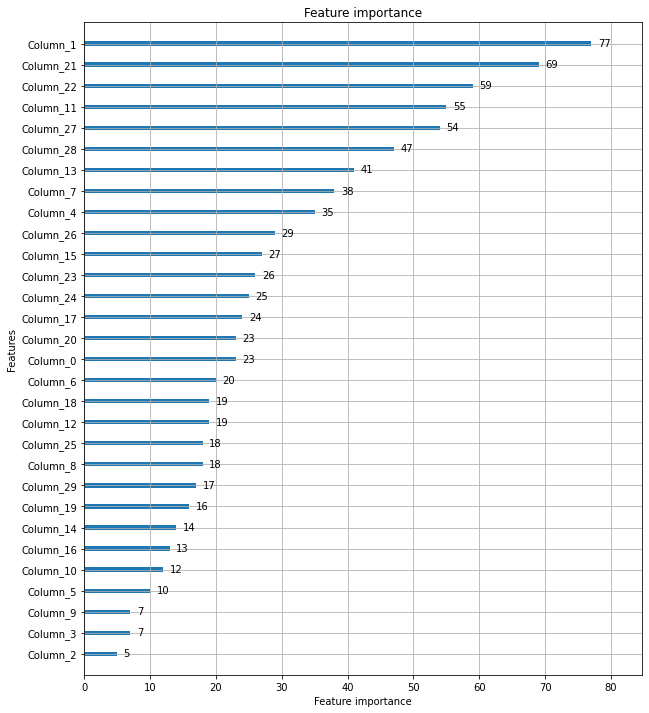

In [ ]:
# plot_importance()를 이용해 피처 중요도 시각화
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10,12))
plot_importance(lgbm_wrapper, ax)

<br>

###**8. 분류 실습 - 캐글 산탄데르 고객 만족 예측**

####**데이터 전처리**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

cust_df = pd.read_csv("/content/drive/MyDrive/Jupyter/train_santander.csv", encoding='latin-1')
print("dataset shape:", cust_df.shape)
cust_df.head(3)

dataset shape: (76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.77,0


In [ ]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


Null값은 존재하지 않고 모두 숫자형이므로 전체 데이터에서 만족과 불만족의 비율을 살펴볼 것임

In [ ]:
print(cust_df['TARGET'].value_counts())
unsatisfied_cnt = cust_df[cust_df['TARGET'] == 1].TARGET.count()
total_cnt = cust_df.TARGET.count()
print('unsatisfied 비율은 {0:.2f}'.format(unsatisfied_cnt/total_cnt))

0    73012
1     3008
Name: TARGET, dtype: int64
unsatisfied 비율은 0.04


In [ ]:
cust_df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [ ]:
print(cust_df.var3.value_counts())

 2         74165
 8           138
-999999      116
 9           110
 3           108
           ...  
 231           1
 188           1
 168           1
 135           1
 87            1
Name: var3, Length: 208, dtype: int64


var3 칼럼에서 -999999 값은 NaN이나 특정 예외값을 대체한 값으로 생각됨. -999999값이 116개로 다른 값에 비해 편차가 너무 심하므로 제일 많은 값인 2로 변환할 것이다.

In [ ]:
cust_df['var3'].replace(-999999, 2, inplace = True)
cust_df.drop('ID', axis=1, inplace=True)

# 피처 세트와 레이블 세트 분리. 레이블 칼럼은 DataFrame의 맨 마지막에 위치해 칼럼 위치 -1로 분리
X_features = cust_df.iloc[:,:-1]
y_labels = cust_df.iloc[:,-1]
print('피처 데이터 shape: ', X_features.shape)

피처 데이터 shape:  (76020, 369)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels, test_size = 0.2, random_state = 0)

train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(X_train.shape, X_test.shape))

print('학습 세트 레이블 값 분포 비율')
print(y_train.value_counts() / train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts() / test_cnt)

학습 세트 Shape:(60816, 369), 테스트 세트 Shape:(15204, 369)
학습 세트 레이블 값 분포 비율
0    0.960964
1    0.039036
Name: TARGET, dtype: float64

 테스트 세트 레이블 값 분포 비율
0    0.9583
1    0.0417
Name: TARGET, dtype: float64


학습과 테스트 데이터 모두 원본 데이터와 유사하게 4% 정도로 불만족 데이터가 나타났다.

<br> 
####**XGBoost 모델 학습과 하이퍼 파라미터 튜닝**

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

# n_estimators = 500
xgb_clf = XGBClassifier(n_estimators=500, random_state = 156)

# 성능 평가 지표를 auc로, 조기 중단 파라미터는 100으로 설정하고 학습 수행
xgb_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='auc', eval_set = [(X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.803548
Will train until validation_0-auc hasn't improved in 100 rounds.
[1]	validation_0-auc:0.805222
[2]	validation_0-auc:0.813162
[3]	validation_0-auc:0.813243
[4]	validation_0-auc:0.816979
[5]	validation_0-auc:0.816629
[6]	validation_0-auc:0.817776
[7]	validation_0-auc:0.818464
[8]	validation_0-auc:0.818295
[9]	validation_0-auc:0.818087
[10]	validation_0-auc:0.818749
[11]	validation_0-auc:0.818521
[12]	validation_0-auc:0.818516
[13]	validation_0-auc:0.818998
[14]	validation_0-auc:0.81999
[15]	validation_0-auc:0.821584
[16]	validation_0-auc:0.821275
[17]	validation_0-auc:0.821602
[18]	validation_0-auc:0.82523
[19]	validation_0-auc:0.824671
[20]	validation_0-auc:0.825722
[21]	validation_0-auc:0.825777
[22]	validation_0-auc:0.826496
[23]	validation_0-auc:0.826436
[24]	validation_0-auc:0.826735
[25]	validation_0-auc:0.827854
[26]	validation_0-auc:0.828164
[27]	validation_0-auc:0.828579
[28]	validation_0-auc:0.829661
[29]	validation_0-auc:0.830722
[30]	validation_0

In [ ]:
from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 테스트의 수행 속도를 향상시키기 위해 n_estimators=100으로 설정
xgb_clf = XGBClassifier(n_estimators=100)

params = {'max_depth':[5,7], 'min_child_weight':[1,3], 'colsample_bytree':[0.5,0.75]}

# cv=3
gridcv = GridSearchCV(xgb_clf, param_grid = params, cv =3)
gridcv.fit(X_train, y_train, early_stopping_rounds = 30, eval_metric='auc', eval_set = [(X_train,y_train),(X_test,y_test)])
print('GridSearchCV 최적 파라미터:', gridcv.best_params_)

xgb_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.715421	validation_1-auc:0.722463
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.802772	validation_1-auc:0.807648
[2]	validation_0-auc:0.800147	validation_1-auc:0.804566
[3]	validation_0-auc:0.805692	validation_1-auc:0.809325
[4]	validation_0-auc:0.814807	validation_1-auc:0.816951
[5]	validation_0-auc:0.810346	validation_1-auc:0.812634
[6]	validation_0-auc:0.810623	validation_1-auc:0.814491
[7]	validation_0-auc:0.818556	validation_1-auc:0.820561
[8]	validation_0-auc:0.822006	validation_1-auc:0.823553
[9]	validation_0-auc:0.820433	validation_1-auc:0.821292
[10]	validation_0-auc:0.826212	validation_1-auc:0.825279
[11]	validation_0-auc:0.830077	validation_1-auc:0.827817
[12]	validation_0-auc:0.832328	validation_1-auc:0.828775
[13]	validation_0-auc:0.832008	validation_1-auc:0.827865
[14]	validation_0-auc:0.830319	validation_1-auc:0.82674

이제 위에서 구한 최적의 파라미터들을 기반으로 다른 하이퍼 파라미터를 변경 또는 추가해 다시 최적화를 진행할 것이다.

In [ ]:
# n_estimators = 1000로 증가, learning_rate = 0.02로 감소, reg_alpha = 0.03으로 추가
xgb_clf = XGBClassifier(n_estimators = 1000, max_depth = 5, colsample_bytree = 0.5, min_child_weight = 1, learning_rate = 0.02, reg_alpha = 0.03, random_state = 156)

# 성능 평가 지표를 auc로, 조기 중단 파라미터 값은 200으로 설정하고 학습 수행
xgb_clf.fit(X_train, y_train, early_stopping_rounds = 200, eval_metric = 'auc', eval_set = [(X_train,y_train), (X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.817665	validation_1-auc:0.814986
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 200 rounds.
[1]	validation_0-auc:0.81987	validation_1-auc:0.814699
[2]	validation_0-auc:0.818798	validation_1-auc:0.813863
[3]	validation_0-auc:0.821696	validation_1-auc:0.815841
[4]	validation_0-auc:0.827716	validation_1-auc:0.822558
[5]	validation_0-auc:0.822253	validation_1-auc:0.818887
[6]	validation_0-auc:0.825218	validation_1-auc:0.818733
[7]	validation_0-auc:0.826898	validation_1-auc:0.820357
[8]	validation_0-auc:0.832836	validation_1-auc:0.827253
[9]	validation_0-auc:0.833574	validation_1-auc:0.827534
[10]	validation_0-auc:0.832205	validation_1-auc:0.825896
[11]	validation_0-auc:0.829664	validation_1-auc:0.824912
[12]	validation_0-auc:0.828593	validation_1-auc:0.824409
[13]	validation_0-auc:0.829674	validation_1-auc:0.824657
[14]	validation_0-auc:0.833554	validation_1-auc:0.82782

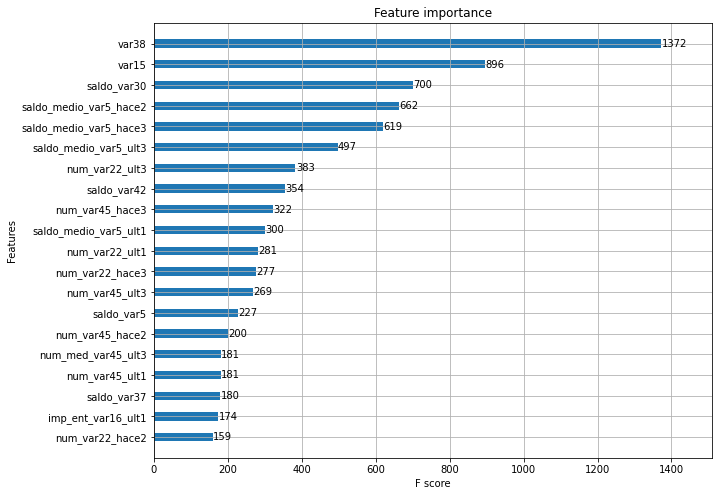

In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1, 1, figsize = (10,8))
plot_importance(xgb_clf, ax=ax, max_num_features=20, height=0.4)

<br>

####**LightGBM 모델 학습과 하이퍼 파라미터 튜닝**

In [ ]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators = 500)
evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds = 100, eval_metric='auc', eval_set=evals, verbose = True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC:{0:.4f}'.format(lgbm_roc_score))

[1]	valid_0's auc: 0.817384	valid_0's binary_logloss: 0.165046
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.81863	valid_0's binary_logloss: 0.16
[3]	valid_0's auc: 0.827411	valid_0's binary_logloss: 0.156287
[4]	valid_0's auc: 0.832175	valid_0's binary_logloss: 0.153416
[5]	valid_0's auc: 0.83481	valid_0's binary_logloss: 0.151206
[6]	valid_0's auc: 0.834721	valid_0's binary_logloss: 0.149303
[7]	valid_0's auc: 0.83659	valid_0's binary_logloss: 0.147804
[8]	valid_0's auc: 0.837602	valid_0's binary_logloss: 0.146466
[9]	valid_0's auc: 0.838114	valid_0's binary_logloss: 0.145476
[10]	valid_0's auc: 0.838472	valid_0's binary_logloss: 0.144681
[11]	valid_0's auc: 0.83808	valid_0's binary_logloss: 0.143978
[12]	valid_0's auc: 0.837771	valid_0's binary_logloss: 0.14341
[13]	valid_0's auc: 0.838063	valid_0's binary_logloss: 0.142835
[14]	valid_0's auc: 0.838485	valid_0's binary_logloss: 0.142296
[15]	valid_0's auc: 0.838542	valid_0's binary_logloss: 0.14

In [ ]:
from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 테스트의 수행 속도를 향상시키기 위해 n_estimators를 200으로 감소
lgbm_clf = LGBMClassifier(n_estimators=200)

params = {'num_leaves':[32,64], 'max_depth':[128,160], 'min_child_samples':[60,100], 'subsample':[0.8,1]}

# cv는 3으로 지정
grid_cv = GridSearchCV(lgbm_clf, param_grid = params, cv=3)
grid_cv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric='auc', eval_set = [(X_train, y_train), (X_test, y_test)])

print('GridSearchCV 최적 파라미터 : ', grid_cv.best_params_)
grid_roc_score = roc_auc_score(y_test, grid_cv.predict_proba(X_test)[:,1], average = 'macro')
print("ROC AUC: {0:.4f}".format(grid_roc_score))

[1]	valid_0's auc: 0.820235	valid_0's binary_logloss: 0.156085	valid_1's auc: 0.81613	valid_1's binary_logloss: 0.164992
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's auc: 0.825778	valid_0's binary_logloss: 0.150951	valid_1's auc: 0.821835	valid_1's binary_logloss: 0.159874
[3]	valid_0's auc: 0.832192	valid_0's binary_logloss: 0.147167	valid_1's auc: 0.827305	valid_1's binary_logloss: 0.156391
[4]	valid_0's auc: 0.837507	valid_0's binary_logloss: 0.144132	valid_1's auc: 0.8334	valid_1's binary_logloss: 0.15332
[5]	valid_0's auc: 0.842275	valid_0's binary_logloss: 0.141652	valid_1's auc: 0.836036	valid_1's binary_logloss: 0.150954
[6]	valid_0's auc: 0.844971	valid_0's binary_logloss: 0.139662	valid_1's auc: 0.838026	valid_1's binary_logloss: 0.149041
[7]	valid_0's auc: 0.846612	valid_0's binary_logloss: 0.138002	valid_1's auc: 0.837776	valid_1's binary_logloss: 0.147504
[8]	valid_0's auc: 0.848539	valid_0's binary_logloss: 0.136579	valid_1's auc: 0.839506	v

In [ ]:
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves = 32, subsample = 0.8, min_child_samples = 100, max_depth = 128)
evals = [(X_test, y_test)]

lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='auc', eval_set = evals, verbose = True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC : {0:.4f}'.format(lgbm_roc_score))

[1]	valid_0's auc: 0.819488	valid_0's binary_logloss: 0.165016
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.822387	valid_0's binary_logloss: 0.159711
[3]	valid_0's auc: 0.829542	valid_0's binary_logloss: 0.156068
[4]	valid_0's auc: 0.834917	valid_0's binary_logloss: 0.153141
[5]	valid_0's auc: 0.837871	valid_0's binary_logloss: 0.150804
[6]	valid_0's auc: 0.839548	valid_0's binary_logloss: 0.148876
[7]	valid_0's auc: 0.841812	valid_0's binary_logloss: 0.147225
[8]	valid_0's auc: 0.842382	valid_0's binary_logloss: 0.14594
[9]	valid_0's auc: 0.842811	valid_0's binary_logloss: 0.144866
[10]	valid_0's auc: 0.843186	valid_0's binary_logloss: 0.143872
[11]	valid_0's auc: 0.843465	valid_0's binary_logloss: 0.14305
[12]	valid_0's auc: 0.843222	valid_0's binary_logloss: 0.142376
[13]	valid_0's auc: 0.843564	valid_0's binary_logloss: 0.141783
[14]	valid_0's auc: 0.843389	valid_0's binary_logloss: 0.141419
[15]	valid_0's auc: 0.84365	valid_0's binary_logloss

<br>

###**9. 분류 실습 - 캐글 신용카드 사기 검출**

####**언더 샘플링과 오버 샘플링의 이해**

레이블이 불균형한 분포를 가진 데이터 세트를 학습시킬 때 예측 성능의 문제가 발생할 수 있는데, 이는 이상 레이블을 가지는 데이터 건수가 정상 레이블을 가진 데이터 건수에 비해 너무 적기 때문에 발생<br>

이를 해결하기 위해 언더 샘플링과, 오버 샘플링 사용<br>
<br>

**언더 샘플링**<br>
- 많은 데이터 세트를 적은 데이터 세트 수준으로 감소시키는 방식
- 과도하게 정상 레이블로 학습/예측하는 부작용 개선 가능하지만 너무 많은 정상 레이블 데이터를 감소시켜 오히려 제대로 된 학습을 수행할 수 없음
<br>
<br>

**오버 샘플링**<br>
- 적은 데이터 세트를 증식하여 학습을 위한 충분한 데이터를 확보하는 방식
- 원본 데이터의 피처 값들을 아주 약간만 변경하여 증식시킴
- SMOTE(Synthetic Minority Over-sampling Technique) : 적은 데이터 세트에 있는 개별 데이터들의 k 최근접 이웃을 찾아 이 데이터와 k개 이웃들의 차이를 일정값으로 만들어 기존 데이터와 약간만 차이나는 새로운 데이터 생성

<br>

####**데이터 일차 가공 및 모델 학습/예측/평가**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

card_df = pd.read_csv("/content/drive/MyDrive/Jupyter/creditcard.csv")
card_df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [ ]:
card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
# 사전데이터 가공
from sklearn.model_selection import train_test_split

# 인자로 입력받은 DataFrame을 복사한 뒤 Time 칼럼만 삭제하고 복사된 DataFrame 반환
def get_preprocessed_df(df=None):
  df_copy = df.copy()
  df_copy.drop('Time', axis=1, inplace=True)
  return df_copy

In [ ]:
# 사전 데이터 가공 후 학습과 테스트 데이터 세트를 반환하는 함수
def get_train_test_dataset(df=None):
  
  # 인자로 입력된 DataFrame의 사전 데이터 가공이 완료된 복사 DataFrame 반환
  df_copy = get_preprocessed_df(df)
  # DataFrame의 마지막 칼럼은 레이블, 나머지는 피쳐들
  X_features = df_copy.iloc[:,:-1]
  y_target = df_copy.iloc[:,-1]
  # train_test_split()으로 학습과 테스트 데이터 분할, stratify=target으로 Stratified 기반 분할
  X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size = 0.3, random_state = 0, stratify = y_target)

  return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

생성한 학습/테스트 데이터 세트의 레이블 값 비율을 백분율로 환산해서 확인

In [ ]:
print('학습 데이터 레이블 값 비율')
print(y_train.value_counts()/y_train.shape[0] * 100)
print('테스트 데이터 레이블 값 비율')
print(y_test.value_counts()/y_test.shape[0] * 100)

학습 데이터 레이블 값 비율
0    99.827451
1     0.172549
Name: Class, dtype: float64
테스트 데이터 레이블 값 비율
0    99.826785
1     0.173215
Name: Class, dtype: float64


target 비율에 맞춰 잘 분할되었고 학습과 테스트 데이터 레이블 비율이 큰 차이 없이 분할된 것을 알 수 있다.<br>
<br> 
이제 로지스틱 회귀와 LightGBM 기반의 모델을 만들어 데이터 가공을 수행하며 예측 성능이 어떻게 변하는지 확인해 볼 것이다.

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
lr_pred_proba = lr_clf.predict_proba(X_test)[:,1]

get_clf_eval(y_test, lr_pred, lr_pred_proba)


오차행렬
[[85281    14]
 [   56    92]]
정확도:0.9992, 정밀도:0.8679, 재현율:0.6216, F1:0.7244, AUC:0.9609


In [ ]:
# 인자로 사이킷런의 Estimator 객체와 학습/테스트 데이터 세트를 입력 받아서 학습/예측/평가 수행
def get_model_train_eval(model, ftr_train=None, ftr_test=None, tgt_train=None,tgt_test=None):
  model.fit(ftr_train, tgt_train)
  pred = model.predict(ftr_test)
  pred_proba = model.predict_proba(ftr_test)[:,1]
  get_clf_eval(tgt_test, pred, pred_proba)

본 데이터 세트는 극도로 불균형한 레이블 값 분포도를 가지고 있으므로 LGBMClassifier 객체 생성 시 **boost_from_average = False**로 파라미터 설정해야함.

In [ ]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, X_train, X_test, y_train, y_test)

오차행렬
[[85289     6]
 [   36   112]]
정확도:0.9995, 정밀도:0.9492, 재현율:0.7568, F1:0.8421, AUC:0.9797


로지스틱 회귀보다 LightGBM으로 모델을 설정하였을 때 예측률이 높은 것을 확인할 수 있다.

<br> 
####**데이터 분포도 변환 후 모델 학습/예측/평가**

왜곡된 분포도를 가지는 데이터를 재가공한 뒤 모델을 다시 테스트 해볼 것이다.<br> 
로지스틱 회귀는 선형 모델로 대부분의 선형 모델은 정규 분포 형태를 유지하는 것을 선호한다. Amount 피처는 신용카드 사용금액으로 정상/사기 트랜잭션을 결정하는 매우 중요한 속성일 가능성이 높으므로 Amount 피처의 분포도를 확인해 볼 것이다.

<function matplotlib.pyplot.show(*args, **kw)>

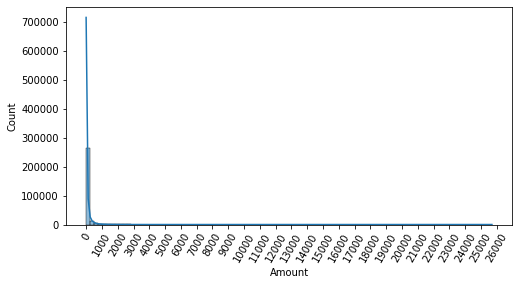

In [ ]:
import seaborn as sns
plt.figure(figsize=(8,4))
plt.xticks(range(0,30000,1000), rotation = 60)
sns.histplot(card_df['Amount'], bins=100, kde=True)

plt.show

대부분의 값들이 1000불 이하에 분포하고 27000불까지 드물지만 존재하여 꼬리가 긴 형태의 분포 곡선을 가짐. 따라서 Amount를 표준 정규 분포 형태로 변환한 뒤 로지스틱 회귀의 예측 성능을 측정해 볼 것이다.

In [ ]:
from sklearn.preprocessing import StandardScaler

# 사이킷런의 StandardScaler를 이용해 정규 분포 형태로 Amount 피처값 변환하는 로직 수행
def get_preprocessed_df(df=None):
  df_copy = df.copy()
  scaler = StandardScaler()
  amount_n = scaler.fit_transform(df_copy['Amount'].values.reshape(-1,1))

  # 변환된 Amount 피처를 DataFrame 맨 앞 칼럼으로 입력
  df_copy.insert(0, 'Amount_Scaled', amount_n)

  # Time, Amount 피처 삭제
  df_copy.drop(['Time','Amount'], axis=1, inplace=True)
  
  return df_copy

In [ ]:
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print("### 로지스틱 회귀 예측 성능 ###")
lr_clf = LogisticRegression()
get_model_train_eval(lr_clf, X_train, X_test, y_train, y_test)

print("\n### LightGBM 예측 성능 ###")
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, X_train, X_test,y_train, y_test)

### 로지스틱 회귀 예측 성능 ###
오차행렬
[[85281    14]
 [   58    90]]
정확도:0.9992, 정밀도:0.8654, 재현율:0.6081, F1:0.7143, AUC:0.9702

### LightGBM 예측 성능 ###
오차행렬
[[85289     6]
 [   36   112]]
정확도:0.9995, 정밀도:0.9492, 재현율:0.7568, F1:0.8421, AUC:0.9773


boost_from_average = False 지정안하면 정밀도, 재현율, F1, AUC 모두 낮게나옴

로지스틱 회귀와 LightGBM 모두 변환 이전보다 성능이 크게 개선되지 않았다.

이번에는 StandardScaler가 아니라 로그 변환을 수행해볼 것이다. 로그 변환은 데이터 분포도가 심하게 왜곡되어 있을 경우 적용하는 중요 기법 중에 하나이다.

In [ ]:
def get_preprocessed_df(df=None):
  df_copy = df.copy()
  # 넘파이의 log1p()를 이용해 Amount 로그 변환
  amount_n = np.log1p(df_copy['Amount'])
  df_copy.insert(0, 'Amount_Scaled', amount_n)
  df_copy.drop(['Time', 'Amount'], axis=1, inplace=True)

  return df_copy

In [ ]:
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print('### 로지스틱 회귀 예측 성능 ###')
get_model_train_eval(lr_clf, X_train, X_test, y_train, y_test)
print('\n### LightGBM 예측 성능 ###')
get_model_train_eval(lgbm_clf, X_train, X_test, y_train, y_test)

### 로지스틱 회귀 예측 성능 ###
오차행렬
[[85283    12]
 [   59    89]]
정확도:0.9992, 정밀도:0.8812, 재현율:0.6014, F1:0.7149, AUC:0.9727

### LightGBM 예측 성능 ###
오차행렬
[[85290     5]
 [   35   113]]
정확도:0.9995, 정밀도:0.9576, 재현율:0.7635, F1:0.8496, AUC:0.9786


로지스틱 회귀의 재현율을 제외하고 모든 수치가 올라 약간씩 성능이 개선되었음을 알 수 있다.

<br>

####**이상치 데이터 제거 후 모델 학습/예측/평가**

이상치 데이터를 제거하는 것은 오랜시간이 걸리고 결정값과 상관성이 높지 않은 피처들의 경우 이상치를 제거하더라도 크게 성능 향상에 기여하지 않기 때문에 corr()를 통해 target과 상관성이 높은 피처를 찾아낸다.

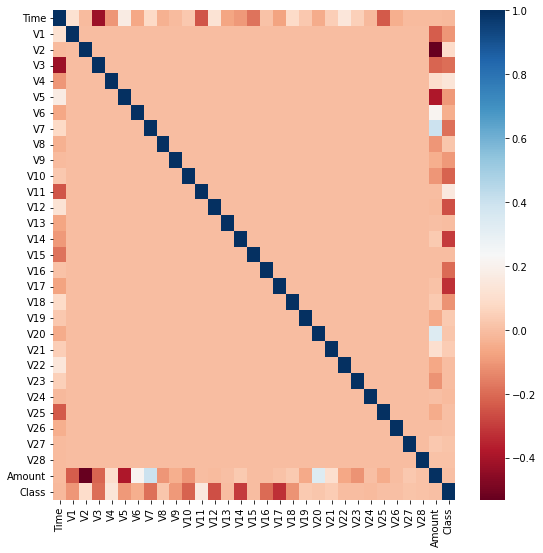

In [ ]:
import seaborn as sns

plt.figure(figsize=(9,9))
corr = card_df.corr()
sns.heatmap(corr, cmap='RdBu')

그래프를 통해 v17, v14 변수가 target인 class변수와 상관성이 높으므로 v14에 대해서만 이상치를 찾아 제거해볼 것이다.<br> 
Amount(신용카드 사용내역)이 클수록 사기라고 판단할 가능성이 크고 값이 크다는 것은 이상치가 생길 수 있다는 뜻이므로 class = 1(사기)인 항목만 뽑아 이상치를 제거한다.

In [ ]:
import numpy as np

def get_outlier(df=None, column=None, weight=1.5):
  # fraud에 해당하는 column 데이터만 추출, Q1과 Q3를 구함
  fraud = df[df['Class'] == 1][column]
  quantile_25 = np.percentile(fraud.values, 25)
  quantile_75 = np.percentile(fraud.values, 75)
 # print(type(fraud))

  # iqr 구하기
  iqr = quantile_75 - quantile_25
  iqr_weight = iqr * weight

  # 최소, 최대값 구하기
  lowest_val = quantile_25 - iqr_weight
  highest_val = quantile_75 + iqr_weight

  # outlier 인덱스 추출
  outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index
  return outlier_index

In [ ]:
outlier_index = get_outlier(card_df, column='V14', weight=1.5)
print('이상치 데이터 인덱스 : ', outlier_index)

이상치 데이터 인덱스 :  Int64Index([8296, 8615, 9035, 9252], dtype='int64')


In [ ]:
def get_preprocessed_df(df=None):
  df_copy = df.copy()

  # Amount 변수 로그변환
  amount_n = np.log1p(df_copy['Amount'])
  df_copy.insert(0, 'Amount_Scaled', amount_n)
  df_copy.drop(['Time', 'Amount'], axis=1, inplace= True)

  # outlier 삭제
  outlier_index = get_outlier(df_copy, column = 'V14', weight=1.5)
  df_copy.drop(outlier_index, axis=0, inplace=True)

  return df_copy

In [ ]:
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print("### 로지스틱 회귀 예측 성능")
get_model_train_eval(lr_clf, X_train, X_test, y_train, y_test)
print('\n### LightGBM 예측 성능 ###')
get_model_train_eval(lgbm_clf, X_train, X_test, y_train, y_test)

### 로지스틱 회귀 예측 성능
오차행렬
[[85281    14]
 [   48    98]]
정확도:0.9993, 정밀도:0.8750, 재현율:0.6712, F1:0.7597, AUC:0.9743

### LightGBM 예측 성능 ###
오차행렬
[[85291     4]
 [   25   121]]
정확도:0.9997, 정밀도:0.9680, 재현율:0.8288, F1:0.8930, AUC:0.9831


두 모델 모두 재현율과 F1 값이 크게 향상된 것을 알 수 있다.

<br>

####**SMOTE 오버 샘플링 적용 후 모델 학습/예측/평가**

SMOTE를 적용할 때는 반드시 학습 데이터 세트만 오버 샘플링을 해야 함. 검증 데이터 세트나, 테스트 데이터 세트를 오버 샘플링할 경우 원본 데이터 세트가 아닌 데이터 세트에서 검증 또는 테스트를 수행하므로 올바른 검증/테스트가 될 수 없음

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 0)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트 : ', X_train.shape, y_train.shape)
print("SMOTE 적용 후 학습용 피처/레이블 데이터 세트 : ", X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 전 레이블 값 분포: \n', pd.Series(y_train).value_counts())
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트 :  (199362, 29) (199362,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트 :  (398040, 29) (398040,)
SMOTE 적용 전 레이블 값 분포: 
 0    199020
1       342
Name: Class, dtype: int64
SMOTE 적용 후 레이블 값 분포: 
 0    199020
1    199020
Name: Class, dtype: int64


SMOTE를 적용 후 0과 1의 분포가 동일한 값이 되었음을 알 수 있다.

In [ ]:
lr_clf = LogisticRegression()
get_model_train_eval(lr_clf, X_train_over, X_test, y_train_over, y_test)

오차행렬
[[82937  2358]
 [   11   135]]
정확도:0.9723, 정밀도:0.0542, 재현율:0.9247, F1:0.1023, AUC:0.9737


재현율은 크게 증가하였지만 정밀도는 큰폭으로 떨어진 것을 알 수 있다. 오버 샘플링으로 실제 데이터 유형보다 너무 많은 class=1 데이터를 학습하며 실제 테스트 데이터 세트에서 class=1로 예측을 많이해 정밀도가 급격히 떨어진 것이다.<br>
분류 결정 임곗값에 따른 정밀도와 재현율 곡선을 통해 위의 모델에 어떤 문제가 있는지 시각적으로 확인해볼 것이다.

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.metrics import precision_recall_curve
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
  # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출
  precisions, recalls, thresholds = precision_recall_curve(y_test,pred_proba_c1)

  # x축을 thresholds, y축 : 정밀도, 재현율 값으로 각각 Plot수행, 정밀도는 점선으로 표시
  plt.figure(figsize=(8,6))
  threshold_boundary = thresholds.shape[0] # 행 끝번호
  plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
  plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')

  # threshold 값 X축의 Scale을 0.1 단위로 변경
  start, end = plt.xlim() # x축 범위 반환
  plt.xticks(np.round(np.arange(start,end,0.1),2)) # 축 간격을 구분하기 위한 눈금표시
  
  # x축, y축 label과 legend, 그리고 grid 설정
  plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
  plt.legend(); plt.grid()
  plt.show()

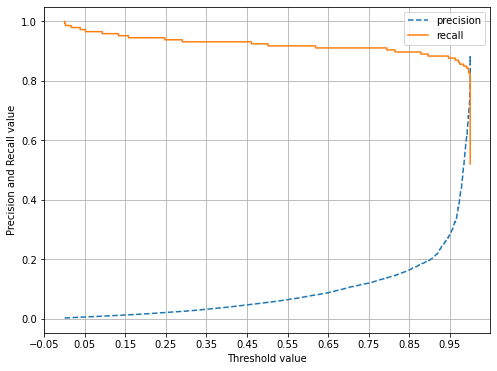

In [ ]:
precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:,1])

임곗값 그림으로 봤을 때 recall값이 좋으면 precision값이 극단적으로 안좋아서 임곗값의 민감도가 너무 심해 올바른 재현율/정밀도 성능을 얻을 수 없으므로 로지스틱 회귀 모형 모델을 채택할 수 없다.

In [ ]:
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves = 64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, X_train_over, X_test, y_train_over, y_test)

오차행렬
[[85286     9]
 [   22   124]]
정확도:0.9996, 정밀도:0.9323, 재현율:0.8493, F1:0.8889, AUC:0.9789


재현율이 이상치만 제거한 경우보다 높아진 것을 확인할 수 있다. SMOTE를 적용하면 재현율은 높아지나 정밀도는 낮아지는 것이 일반적이다.

<br><br> 
###**10. 스태킹 앙상블**

- 개별 알고리즘으로 예측한 데이터를 기반으로 다시 예측을 수행
- 두 종류의 모델 필요
  - 개별적인 기반 모델 : 원 데이터 학습
  - 최종 메타 모델 : 개별 기반 모델의 예측 데이터를 학습 데이터로 만들어서 학습

<br> 
####**기본 스태킹 모델**

In [ ]:
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer_data = load_breast_cancer()

X_data = cancer_data.data
y_label = cancer_data.target

X_train, X_test, y_train, y_test = train_test_split(X_data, y_label, test_size = 0.2, random_state = 0)

In [ ]:
knn_clf = KNeighborsClassifier()
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0)
dt_clf = DecisionTreeClassifier()
ada_clf = AdaBoostClassifier(n_estimators=100)

# 스태킹으로 만들어진 데이터 세트 학습/예측할 최종 메타 모델
lr_final = LogisticRegression(C=10)

# 개별 모델 학습
knn_clf.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)
dt_clf.fit(X_train, y_train)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100)

In [ ]:
# 개별 모델의 예측 데이터 세트 생성, 정확도 측정
knn_pred = knn_clf.predict(X_test)
rf_pred = rf_clf.predict(X_test)
dt_pred = dt_clf.predict(X_test)
ada_pred = ada_clf.predict(X_test)

print('KNN 정확도 : {0:.4f}'.format(accuracy_score(y_test, knn_pred)))
print('랜덤 포레스트 정확도 : {0:.4f}'.format(accuracy_score(y_test, rf_pred)))
print('결정 트리 정확도 : {0:.4f}'.format(accuracy_score(y_test, dt_pred)))
print('에이다부스트 정확도 : {0:.4f}'.format(accuracy_score(y_test, ada_pred)))

KNN 정확도 : 0.9386
랜덤 포레스트 정확도 : 0.9649
결정 트리 정확도 : 0.9035
에이다부스트 정확도 : 0.9561


개별 알고리즘들의 예측값을 칼럼 레벨로 옆으로 붙여 피처 값으로 만들어, 최종 메타 모델인 로지스틱 회귀의 학습 데이터로 다시 사용한다.<br> 
반환된 예측 데이터 세트는 1차원 형태의 naddray이므로 행 형태로 붙인 뒤 transpose()를 사용하여 행열전환을 한다.

In [ ]:
pred = np.array([knn_pred, rf_pred, dt_pred, ada_pred])
print(pred.shape)

(4, 114)


In [ ]:
pred = np.transpose(pred)
print(pred.shape)

(114, 4)


In [ ]:
lr_final.fit(pred, y_test)
final = lr_final.predict(pred)

print('최종 메타 모델의 예측 정확도 : {0:.4f}'.format(accuracy_score(y_test, final)))

최종 메타 모델의 예측 정확도 : 0.9737


개별 모델일 때 보다 정확도가 더 향상한 것을 확인할 수 있다.
<br><br> 
####**CV 세트 기반의 스태킹**

기본 스태킹 모델에서는 최종 메타 모델이 테스트용 레이블 데이터 세트를 기반으로 학습을 하기 때문에 과적합 문제가 발생할 수 있다.<br> 
이를 해결하기 위해 CV 세트 기반 스태킹을 사용한다.
<br><br>
Step 1
- 각 모델별로 학습세트를 1개의 검증 폴드와 (폴드 - 1)개의 학습 폴드로 나눈뒤 이를 학습하고 예측하는 과정을 통해 예측 결괏값을 스태킹해 최종 메타 모델에서 학습 데이터로 사용<br> 
- 각 모델의 테스트 세트를 위의 학습한 데이터를 가지고 예측하여 예측 결괏값을 스태킹해 최종 메타 모델에서 테스트 데이터로 사용<br>
<br> 

Step 2
- 개별 모델에서 나온 학습 데이터를 모두 합쳐 메타 모델의 학습 데이터로, 개별 모델에서 나온 테스트 데이터를 모두 합쳐 메타 모델의 테스트 데이터를 생성한다.
- 메타 모델이 사용할 최종 학습 데이터와 원본 데이터의 레이블 데이터를 합쳐 메타 모델 학습 후, 최종 테스트 데이터로 예측을 수행한 뒤, 최종 예측 결과를 원본 테스트 데이터의 레이블 데이터와 비교해 평가하면 된다.

In [ ]:
# Step 1
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

# 개별 기반 모델에서 최종 메타 모델이 사용할 학습 및 테스트용 데이터를 생성하기 위한 함수
def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds):
  # 지정된 n_folds 값으로 KFold 생성
  kf = KFold(n_splits = n_folds, shuffle=False)

  # 추후에 메타 모델이 사용할 학습 데이터 반환을 위한 넘파이 배열 초기화
  train_fold_pred = np.zeros((X_train_n.shape[0], 1))
  test_pred = np.zeros((X_test_n.shape[0], n_folds))
  print(model.__class__.__name__, 'model 시작')

  for folder_counter, (train_index, valid_index) in enumerate(kf.split(X_train_n)):
    # 입력된 학습 데이터에서 기반 모델이 학습/예측할 폴드 데이터 세트 추출
    print('\t 폴드 세트: ', folder_counter, '시작')
    X_tr = X_train_n[train_index]
    y_tr = y_train_n[train_index]
    X_te = X_train_n[valid_index]

    # 폴드 세트 내부에서 다시 만들어진 학습 데이터로 기반 모델 학습 수행
    model.fit(X_tr, y_tr)
    # 폴드 세트 내부에서 다시 만들어진 검증 데이터로 기반 모델 예측 수행
    train_fold_pred[valid_index, : ] = model.predict(X_te).reshape(-1,1)
    # 입력된 원본 테스트 데이터를 폴드 세트내 학습된 기반 모델에서 예측 후 데이터 저장
    test_pred[:, folder_counter] = model.predict(X_test_n)

  # 폴드 세트 내에서 원본 테스트 데이터를 예측한 데이터를 평균하여 테스트 데이터로 생성
  test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1)

  # train_fold_pred는 최종 메타 모델이 사용하려는 학습 데이터, test_pred_mean은 테스트 데이터
  return train_fold_pred, test_pred_mean

In [ ]:
knn_train, knn_test = get_stacking_base_datasets(knn_clf, X_train, y_train, X_test, 7)
rf_train, rf_test = get_stacking_base_datasets(rf_clf, X_train, y_train, X_test, 7)
dt_train, dt_test = get_stacking_base_datasets(dt_clf, X_train, y_train, X_test, 7)
ada_train, ada_test = get_stacking_base_datasets(ada_clf, X_train, y_train, X_test, 7)

KNeighborsClassifier model 시작
	 폴드 세트:  0 시작
	 폴드 세트:  1 시작
	 폴드 세트:  2 시작
	 폴드 세트:  3 시작
	 폴드 세트:  4 시작
	 폴드 세트:  5 시작
	 폴드 세트:  6 시작
RandomForestClassifier model 시작
	 폴드 세트:  0 시작
	 폴드 세트:  1 시작
	 폴드 세트:  2 시작
	 폴드 세트:  3 시작
	 폴드 세트:  4 시작
	 폴드 세트:  5 시작
	 폴드 세트:  6 시작
DecisionTreeClassifier model 시작
	 폴드 세트:  0 시작
	 폴드 세트:  1 시작
	 폴드 세트:  2 시작
	 폴드 세트:  3 시작
	 폴드 세트:  4 시작
	 폴드 세트:  5 시작
	 폴드 세트:  6 시작
AdaBoostClassifier model 시작
	 폴드 세트:  0 시작
	 폴드 세트:  1 시작
	 폴드 세트:  2 시작
	 폴드 세트:  3 시작
	 폴드 세트:  4 시작
	 폴드 세트:  5 시작
	 폴드 세트:  6 시작


In [ ]:
# Step 2
Stack_final_X_train = np.concatenate((knn_train, rf_train, dt_train, ada_train), axis=1)
Stack_final_X_test = np.concatenate((knn_test, rf_test, dt_test, ada_test), axis=1)
print('원본 학습 피처 데이터 Shape:', X_train.shape, '원본 테스트 피처 Shape:', X_test.shape)
print('스태킹 학습 피처 데이터 Shape:', Stack_final_X_train.shape, '스태킹 테스트 피처 데이터 Shape:', Stack_final_X_test.shape)

원본 학습 피처 데이터 Shape: (455, 30) 원본 테스트 피처 Shape: (114, 30)
스태킹 학습 피처 데이터 Shape: (455, 4) 스태킹 테스트 피처 데이터 Shape: (114, 4)


In [ ]:
# 최종 메타 모델 학습/예측
lr_final.fit(Stack_final_X_train, y_train)
stack_final = lr_final.predict(Stack_final_X_test)

print('최종 메타 모델의 예측 정확도:{0:.4f}'.format(accuracy_score(y_test, stack_final)))

최종 메타 모델의 예측 정확도:0.9825


최종 메타 모델의 예측 정확도는 약 98%로 측정되었다.<br>
지금까지의 예제에서는 개별 모델의 알고리즘에서 파라미터 튜닝을 최적으로 하지 않았지만, 스태킹을 이루는 모델은 최적으로 파라미터를 튜닝한 상태에서 스태킹 모델을 만드는 것이 일반적이다.